<a href="https://colab.research.google.com/github/KM-Pusat/TensorFlow_Learning_KMP/blob/main/02_KMP_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Regression with TensorFlow

Terdapat banyak sekali definisi untuk   [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) namun dalam kasus kita menggunakan **TensorFlow**, kita akan menyederhanakannya menjadi: memprediksi angka (predict number).

Misalnya, kalian akan menggunakan regression untuk:
- Memprediksi harga jual rumah dengan informasi yang diberikan (seperti jumlah kamar, ukuran, jumlah kamar mandi).
- Memprediksi [koordinat kotak pembatas item](https://answers.opencv.org/upfiles/14285711591298042.png) dalam gambar.
- Memprediksi biaya asuransi kesehatan untuk individu berdasarkan demografi mereka (umur, jenis kelamin, dan ras).

Dalam notebook (hands-on) ini, Kita akan menetapkan dasar atau landasan bagaimana kita dapat mengambil sampel input (data kalian), membangun neural network untuk menemukan pola dalam input tersebut dan kemudian membuat sebuah prediksi (dalam bentuk numerik) berdasarkan input tersebut.

## Apa yang akan dibahas

Lebih spesifik, kita akan melakukan hal-hal berikut dengan TensorFlow:
- Arsitektur dari  model regression
- Input shapes dan output shapes
  - `X`: fitur/data (inputs)
  - `y`: label (outputs)
- Membuat data khusus untuk dilihat (view) dan disesuaikan (fit)
- Langkah-langkah dalam pemodelan
  - Creating a model (membuat model)
  - Compiling a model (menyusun model)
    - Mendefinisikan loss function (fungsi loss)
    - Mengatur dan menyiapkan optimizer (pengoptimal)
    - Membuat evaluation metrics (matriks evaluasi)
  - Menyesuaikan model (menggunakannya untuk menemukan pola dalam data kita)
- Mengevaluasi model
  - Memvisualisasikan model ("visualize, visualize, visualize")
  - Melihat training curves (kurva pelatihan)
  - Bandingkan prediksi dengan kebenaran dasar (menggunakan model matrik evaluasi kita)
- Menyimpan model (agar kita bisa menggunakannya nanti)
- Memuat model

Jangan khawatir jika masih belum ada yang dipahami sekarang, namun kita akan membahasnya satu per satu.

## Bagaimana kalian menggunakan notebook (hands-on) ini

Kalian dapat membaca deskripsi dan kodenya (semua kode harusnya bisa dirun), tetapi ada opsi yang lebih baik.

Tulis semua kode sendiri.

Ya. serius. Membuat notebook, dan tulis ulang setiap barisnya sendiri. Selidiki, dan lihat apakah kalian bisa memecahkan kode tersebut, dan mengapa kode tersebut bisa berjalan?

Klain tidak harus menulis deskripsi teks (text cell) tetapi dengan menulis kode tersebut sendiri adalah cara yang bagus untuk mendapatkan pengalaman secara langsung.

Jangan khawatir jika membuat kesalahan, bahkan kami yang membuat notebook ini juga melakukannya. Sehingga cara untuk menjadi lebih baik dan dapat mengurangi kesalahan adalah dengan  **menulis lebih banyak kode**.

## Arsitektur typical (khas) dari regresison neural network

Kata *typical* memang sengaja digunakan.

Mengapa?

Karena terdapat banyak cara (bahkan mungkin tidak terbatas) untuk menulis neural networks.

Tetapi terdapat pula pengaturan yang umum untuk memasukan kumpulan angka, menemukan pola didalamnya dan kemudian mengeluarkan semacam angka target (result).

Ya, mungkin kalimat yang dipaparkan masih belum jelas, tetapi kita akan segera melihat dan memahaminya dalam coding nantinya.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Shape (bentuk) yang sama dengan jumlah fitur / **data input** (misalnya. 3 untuk # kamar tidur, # kamar mandi, # garasi dalam prediksi harga rumah) |
| Hidden layer(s) | Spesifik masalah, minimum = 1, maksimum = tidak terbatas |
| Neurons per hidden layer | Spesifik masalah, umumnya 10 sampai 100 |
| Output layer shape | Shape (bentuk) yang sama dengan bentuk prediksi yang diinginkan / **output** (misalnya. 1 untuk harga rumah) |
| Hidden activation | Biasanya menggunakan [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) atau [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error) / Huber (kombinasi dari MSE dan MAE) jika [outliers](https://id.wikipedia.org/wiki/Pencilan) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

*Tabel 1: Arsitektur umum dari regression network. Sumber: Diadaptasi dari halaman 293 pada buku [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book oleh Aurélien Géron](https://drive.google.com/file/d/1Rx0XHxYYkgKrmsBu6hqd_kSmIHOWzfgs/view?usp=sharing)*

Sekali lagi, jika kalian baru mengenal neural networks dan deep learning secara umum, sebagian besar isi pada tabel diatas mungkin tidak kalian pahami. Namun jangan khawatir, kita akan segera membahas semuanya pada hands-on ini.

> 🔑 **Catatan:**  **hyperparameter** dalam machine learning adalah sesuatu yang dapat diatur oleh data analyst atau developer, di mana **parameter** biasanya menggambarkan sesuatu yang dipelajari oleh model dengan sendirinya (nilai yang tidak secara eksplisit ditetapkan oleh analis).

Oke, cukup untuk penjelasannya, mari sekarang kita mulai menulis kode.

Untuk menggunakan TensorFlow, kita akan mengimport sebagai `tf` (singkatan dari TensorFlow).

In [ ]:
import tensorflow as tf
print(tf.__version__) # Mengecek versi TensorFlow (seharusnya 2.x+)

import datetime
print(f"Notebook terkahir dijalankan (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook terkahir dijalankan (end-to-end): 2023-06-14 08:14:15.664768


## Membuat data untuk di lihat (view) dan disesuaikan (fit)

Karena kita sedang mengerjakan  **regression problem** (memprediksi angka) mari kita buat beberapa data linear (garis lurus) untuk dimodelkan.

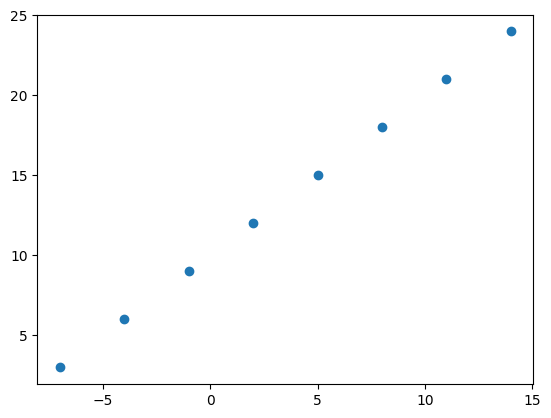

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat fitur
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Membuat label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Memvisualisasikan data tersebut
plt.scatter(X, y);

Sebelum kita melakukan pemodelan, bisakah kalian menghitung pola antara `X` dan `y`?

Sebagai contoh, Anggaplah saya bertanya kepada kalian, berdasarkan data ini berapakah nilai `y` jika `X` adalah 17.0?

Atau bagaimana jika `X` adalah -10.0?

Penemuan pola seperti ini adalah inti dari apa yang akan dilakukan oleh neural network untuk kita.

## Regression input shapes dan output shapes

salah satu konsep yang paling penting ketika bekerja dengan neural networks adalah input dan output shapes.

**input shape** adalah bentuk data yang masuk ke dalam model.

**output shape** adalah bentuk data yang ingin kalian dapat dari model kalian.

Hal ini akan berbeda tergantung pada masalah yang sedang kalian kerjakan.

Neural networks menerima angka dan mengeluarkan angka. Angka-angka ini biasanya direpresentasikan sebagai tensor (atau arrays).

Sebelumnya, kita telah membuat data menggunakan NumPy arrays, tetapi kita dapat melakukan hal yang sama dengan tensors.

In [ ]:
# Contoh input dan output shape dari regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

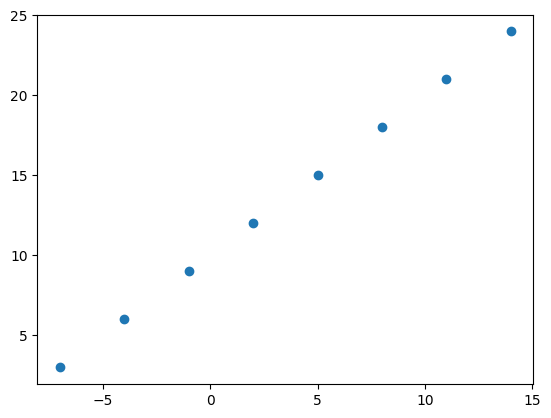

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat fitur (menggunakan tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Membuat label (menggunakan tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Memvisualisasikan data tersebut
plt.scatter(X, y);

Tujuan kita disini adalah menggunakan `X` untuk memprediksi `y`.

Jadi, **input** kita akan menjadi `X` dan **output** akan menjadi `y`.

Dengan mengetahui hal ini, menurut kalian bagaimanakah bentuk input dan output kita nantinya?

Mari kita coba dan lihat.

In [ ]:
# Mengambil satu contoh dari X
input_shape = X[0].shape

# Mengambil satu contoh dari y
output_shape = y[0].shape

input_shape, output_shape # Keduanya adalah scalar (tidak mempunyai shape)

(TensorShape([]), TensorShape([]))

Hmm?

Dari sini, terlihat jika input dan output kita tidak memiliki shape?

Bagaimana itu bisa terjadi?

Itu karena apa pun jenis data yang kita inputkan ke model kita, model akan selalu menerima input dan menghasilkan output semacam tensor.

Tetapi dalam kasus kita karena datasetnya (hanya 2 list kecil dari angka), kita melihat jenis tensor khusus, lebih spesifik lagi yaitu tensor rank 0 atau skalar.

In [ ]:
# Mari kita melihat satu per satu contohnya
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Dalam kasus kita, kita akan mencoba membuat model untuk memprediksi pola antara `X[0]` yang sama dengan `-7.0` dan `y[0]` yang sama dengan `3.0`.

Jadi sekarang kita mendapatkan jawaban, kita akan mencoba menggunakan 1 nilai `X` untuk memprediksi 1 nilai `y`.

Kalian mungkin berfikir, "sepertinya ini cukup sulit untuk memprediksi sebuah garis lurus...".

Dan kalian mungkin benar.

Tetapi konsep yang akan kita bahas disini, adalah konsep dari input dan output shape pada sebuah model merupakan hal yang fundamental.

Faktanya, hal tersebut mungkin merupakan dua hal yang paling banyak kalian habiskan ketika bekerja dengan neural networks: **Memastikan bahwa input dan output kalian memiliki shape yang benar**.

Jika memang tidak paham sekarang, kita akan melihat lebih banyak contoh lagi nanti (kalian akan melihat bahwa shape input dan output dapat berupa apa saja yang dapat kalian bayangkan).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*Jika kalian sedang membangun algoritma machine learning untuk memprediksi harga rumah, input kalian mungkin berupa jumlah kamar tidur , jumlah kamar mandi, dan jumlah garasi, sehingga kalian memiliki 3 shape input (3 fitur yang berbeda). Dan karena kalian mencoba memprediksi harga rumah, output shape kalian adalah 1 .*

## Langkah-langkah pemodelan dengan TensorFlow

Setelah kita mengetahui data apa yang dimiliki serta shape input dan outputnya, sekarang kita akan lihat bagaimana kita membangun neural network untuk memodelkannya.

Di TensorFlow, biasanya ada 3 langkah yang fundamental untuk membuat dan melatih model.

1. **Membuat model** - menyusun sendiri lapisan neural network (menggunakan [Functional](https://www.tensorflow.org/guide/keras/functional) atau [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) atau mengimport model yang telah dibuat sebelumnya (yang dikenal dengan istilah transfer learning).
2. **Menyusun model** - mendefinisikan bagaimana kinerja model harus diukur (loss/metrics) serta mendefinisikan bagaimana model harus ditingkatkan (optimizer).
3. **Mencoba / memasangkan model** - membiarkan model mencoba menemukan pola dalam data (bagaimana `X` bisa menjadi `y`).

Mari kita lihat cara kerjanya dengan menggunakan [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) untuk membangun model regression data untuk kita. Dan kemudian kita akan membahasnya satu per satu.

> **Catatan:** Jika kalian menggunakan [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, fungsi `fit()` tidak lagi meningkatkan skala data input dari `(batch_size, )` menjadi `(batch_size, 1)`. Untuk memperbaikinya, kalian harus memperluas dimensi data input menggunakan `tf.expand_dims(input_data, axis=-1)`.
>
> Dalam kasus kita, ini berarti alih-alih kita menggunakan `model.fit(X, y, epochs=5)`, gunakanlah `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Membuat model dengan menggunakan Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Menyusun model tersebut
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Mencoba model
# model.fit(X, y, epochs=5) # ini akan error dengan TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 6s 6s/step - loss: 21.2908 - mae: 21.2908
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 20.8977 - mae: 20.8977
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 20.5205 - mae: 20.5205
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 20.2393 - mae: 20.2393
Epoch 5/5
1/1 [==============================] - 0s 36ms/step - loss: 19.9580 - mae: 19.9580


Duarr!

Kita baru saja melatih sebuah model untuk mengetahui pola antara `X` dan `y`.

Bagaimana hasilnya menurut kalian?

In [ ]:
# Melihat X dan y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

Menurut kalian, apa yang akan terjadi jika kita memberikan nilai `X` sebesar 17.0 pada model kita?

In [ ]:
# Membuat prediction dengan model
model.predict([17.0])

1/1 [==============================] - 0s 71ms/step


array([[-22.475925]], dtype=float32)

Model tersebut tidak berjalan dengan baik... seharusnya menghasilkan output yang mendekati 27.0.

> 🤔 **Pertanyaan:** Apa itu Keras? selama kita membuat model neural network dengan TensorFlow tetapi setiap menulis kode TensorFlow, `keras` muncul setelah `tf` (Misalnya. `tf.keras.layers.Dense()`)?

Sebelum TensorFlow 2.0+, [Keras](https://keras.io/) adalah API yang dirancang agar dapat membangun deep learning models dengan mudah. Semenjak TensorFlow 2.0+, fungsinya telah terintegrasi dengan baik dalam TensorFlow library.

## Meningkatkan peforma model

Menurut kalian, bagaimana caranya untuk mmeningkatkan model yang kita buat barusan?

Jika kalian menebak dengan mengubah beberapa hal yang kita lakukan diatas, kalian benar.

Untuk meningkatkan peforma model, kita perlu mengubah (alter) hampir semua bagian dari 3 langkah yang telah dilakukan sebelumnya.

1. **Membuat model** - disini kalian bisa menambahkan lebih banyak layers, menambah number of hidden units (atau biasa disebut neurons) di dalam setiap layer, mengubah activation functions disetiap layer.
2. **Menyusun model** - Kalian mungkin ingin mengubah optimization function atau mungkin **learning rate** dari optimization function.
3. **Mencoba / memasangkan model** - mungkin kalian dapat mencoba menggunakan model lebih banyak **epoch** (membuat model berlatih lebih lama) atau menggunakan lebih banyak data (berikan model lebih banyak contoh / data untuk dipelajari).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*Ada banyak cara yang berbeda untuk meningkatkan potensi neural network. Beberapa yang paling umum termasuk: meningkatkan jumlah layers (membuat network deeper), meningkatkan number of hidden units (membuat network lebih luas) dan mengubah learning rate. Karena semua nilai ini dapat diubah oleh developer, semua itu biasanya disebut sebagai [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) dan praktik untuk menemukan hyperparameter yang terbaik disebut sebagai [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Wah. Kita baru saja berkenalan dengan beberapa langkah yang mungkin dilakukan. Yang penting untuk diingat adalah, bagaimana kalian mengubah setiap langkah ini akan bergantung pada masalah yang sedang kalian kerjakan.

Dan hal baiknya adalah, dalam beberapa permasalahan berikutnya, kita akan mempraktikkannya semuanya.

Untuk saat ini mari kita buat sederhana, yang akan kita lakukan adalah melatih model lebih lama (hyperparameter lain akan tetap sama).

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Membuat model (sama seperti yang diatas)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# menyusun model (sama seperti yang diatas)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Mencoba model (kali ini kita akan melatih model lebih lama)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # melatihnya dengan 100 epochs bukan 10

Epoch 1/100
1/1 [==============================] - 1s 525ms/step - loss: 9.2301 - mae: 9.2301
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0976 - mae: 9.0976
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9651 - mae: 8.9651
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.8326 - mae: 8.8326
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 8.7001 - mae: 8.7001
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.5676 - mae: 8.5676
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4351 - mae: 8.4351
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3026 - mae: 8.3026
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1701 - mae: 8.1701
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.0376 - mae: 8.0376
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

Kalian mungkin telah melihat nilai loss menurun dari sebelumnya (dan terus menurun seiring bertambahnya jumlah epoch).

Menurut kalian, apa artinya hal tersebut ketika kita membuat prediksi dengan model kita?

Bagaimana jika kita mencoba memprediksi 17.0 lagi?

In [ ]:
# Melihat kembali X dan y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Mencoba prediksikan berapa nilai y jika X adalah 17,0
model.predict([17.0]) # jawaban yang benar adalah 27.0 (y = X + 10)

1/1 [==============================] - 0s 49ms/step


array([[29.854298]], dtype=float32)

Jauh lebih baik!

Hasil prediksi kita lebih dekat kali ini. Tapi kita masih bisa lebih baik lagi.

Sekarang kita sudah melatih model, lalu bagaimana kita bisa mengevaluasinya sehingga mendapatkan hasil yang lebih baik lagi?

## Mengevaluasi model

Alur kerja umum yang akan kalian lalui ketika membangun neural network:

```
Membuat model -> evaluasikan ini -> membuat model (yang lebih sesuai) -> evaluasikan ini -> membuat model (yang lebih sesuai) -> evaluasikan ini...
```

Penyempurnaan / membuat model yang lebih sesuai (twearking) bukan dengan membangun model dari awal, tetapi menyesuaikan model yang sudah ada.

### Visualize, visualize, visualize

Ketika berbicara tentang evaluasi, kalian pasti akan mengingat kata-kata ini "visualisasikan, visualisasikan, visualisasikan."

Hal ini karena kalian mungkin lebih baik melihat atau melakukan sesuatu daripada memikirkannya.

Merupakan ide yang bagus untuk memvisualisasikan:
* **Data** - data seperti apa yang sedang kalian kerjakan? dan seperti apa bentuknya (shape)?
* **Model itu sendiri** - seperti apa bentuk arsitekturnya? Apa saja shape yang berbeda?
* **Model training** - bagaimana kinerja model saat belajar?
* **Model prediction** - bagaimana prediksi model sesuai dengan kebenaran dasar (label asli)?

Mari kita mulai dengan memvisualisasikan model.

tapi pertama-tama, kita akan membuat dataset yang sedikit lebih besar dan model baru yang dapat kita gunakan (model ini akan sama seperti sebelumnya, tetapi semakin banyak latihan akan menjadi lebih baik).


In [ ]:
# Membuat dataset yang lebih besar
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Membuat label untuk dataset (mengikuti pola yang sama seperti sebelumya)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Karena $y=X+10$, kita juga dapat membuat label seperti ini:

In [ ]:
# Memiliki hasil yang sama seperti diatas
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Membagi data menjadi training set dan test set

Salah satu langkah paling umum dan penting dalam project machine learning adalah membuat set pelatihan (training set) dan set pengujian (test set) atau jika diperlukan juga bisa menambahkan set validasi (validation set).

Setiap set memiliki tujuan tertentu:
* **Training set** - model akan belajar dari data ini, yang biasanya terdiri dari 70-80% dari total data yang tersedia (seperti materi pelajaran yang kalian pelajari selama satu semester).
* **Validation set** - model diset pada data ini, yang biasanya 10-15% dari total data yang tersedia (seperti ujian praktik yang kalian ambil sebelum ujian akhir).
* **Test set** - model akan dievaluasi pada tahap ini untuk menguji apa yang telah dipelajari, biasanya 10-15% dari total data yang tersedia (seperti ujian akhir yang kalian ambil pada akhir semester).

Untuk saat ini, kita hanya akan menggunakan training dan test set, ini berarti kita akan memiliki dataset untuk model kita pelajari dan juga evaluasi.

Kita dapat membuatnya dengan memisahkan array `X` dan `y`.

> 🔑 **Catatan:** Ketika berurusan dengan data pada dunia nyata, langkah ini biasanya akan dilakukan diawal project (test set harus selalu dipisahkan dari semua data lainnya). Hal ini supaya model kita dapat belajar pada training data dan kemudian mengevaluasinya pada test data untuk mendapatkan indikasi seberapa baik model tersebut dapat **menggeneralisasi** contoh-contoh yang tidak terlihat.

In [ ]:
# Melihat berapa banyak sampel data yang kita miliki
len(X)

50

In [ ]:
# Membagi data menjadi train set dan test set
X_train = X[:40] # Pertama 40 contoh (80% dari data)
y_train = y[:40]

X_test = X[40:] # Terakhir 10 contoh (20% dari data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Memvisualisasikan data

Sekarang kita sudah memiliki training dan test data, akan menjadi ide bagus jika kita mencoba memvisualisasikannya.

Mari kita plot dengan beberapa warna yang bagus untuk membedakan antara training data dan test data.

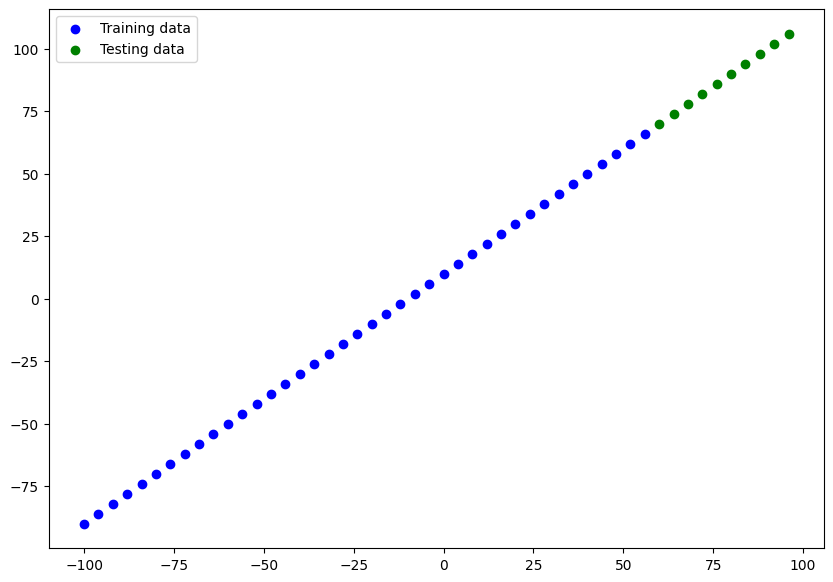

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data berwarna blue (biru)
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data berwarna green (hijau)
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Menampilkan legend / visualisasi
plt.legend();

Beautiful! Kalian dapat memvisualisasikan data kalian, model kalian, atau apapun itu kapan pun, dan itu adalah ide yang bagus.

Dengan mengingat grafik ini, apa yang akan kita coba lakukan adalah membuat model yang mempelajari pola pada titik-titik biry (`X_train`) untuk menggambar titik-titik hijau (`X_test`).

Saatnya membangun sebuah model. Kita akan membuat model yang sama persis dengan model sebelummnya (model yang telah kita latih lebih lama).

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Membuat model (sama seperti yang diatas)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Menyusun model (sama seperti yang diatas)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Mencoba model (sama seperti yang diatas)
#model.fit(X_train, y_train, epochs=100) # commented out karena (disengaja)

## Memvisualisasikan model

Setelah kalian membuat sebuah model, kalian mungkin ingin melihatnya (terutama jika kalian belum pernah membuat model sebelumnya).

Kalian dapat melihat layers dan shape model kalian dengan memanggil fungsi [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary).

> 🔑 **Catatan:** Memvisualisasikan model akan sangat membantu ketika kalian mengalami ketidakcocokan antara input dan output shape.

In [ ]:
# Tidak berhasil / error (model belum dibuat atau fit)
model.summary()

ValueError: ignored

Ahh, cell diatas error karena kita belum fit (mencoba / mencocokan) atau membangun model kita.

Kita juga belum memberitahu apa input shape yang seharusnya diharapkan.

Ingat diatas, bagaimana kita membahas bahwa bentuk inputnya hanya satu angka?

Kita dapat memberitahu model kita mengenai bentuk input dari data kita dengan menggunakan parameter `input_shape` pada layer pertama (biasanya jika `input_shape` tidak didefinisikan, Keras akan mencoba mencari tahu secara otomatis).

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Membuat model (sama seperti yang diatas)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # Mendefinisikan input_shape pada model kita
])

# Menyusun model (sama seperti yang diatas)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Ini akan berhasil setelah kita mendefinisikan input_shape
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Memanggil fungsi `summary()` pada model kita akan menampilkan layer-layer yang ada didalamnya, output shape dan jumlah parameter.
* **Total params** - jumlah total parameter dalam model.
* **Trainable parameters** - ini adalah parameter (pola) yang dapat diupdate oleh model saat dilatih.
* **Non-trainable parameters** - yaitu parameter-parameter yang tidak diupdate selama training (ini biasa terjadi ketika kalian membawa pola yang sudah dipelajari dari model lain selama transfer learning).

> 📖 **Resource:** Untuk gambaran yang lebih jelas tentang trainable parameter dalam suatu layer / lapisan, bisa melihat [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

> 🛠 **Latihan:** Cobalah bermain-main dengan hidden units pada `Dense` layer (misalnya. `Dense(2)`, `Dense(3)`). Bagaimana hal itu dapat mengubah Total / Trainable params? Selidiki pula apa yang menyebabkan perubahan tersebut.

Untuk sekarang, yang perlu kalian pikirkan tentang parameter-parameter ini adalah pola yang dapat dipelajari dalam data.

Sekarang mari kita fit / mencoba model kita dengan training data.

In [ ]:
# Mencoba model dengan training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose digunakan untuk mengatur seberapa banyak output yang dihasilkan

In [ ]:
# Mekihat model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Selain dengan menggunakan summary, kalian juba bisa melihat plot 2D dari model dengan menggunakan [`plot_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model).

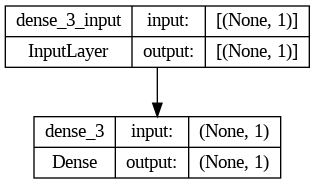

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Dalam kasus kita, model yang digunakan hanya memiliki input dan output, tetapi dengan memvisualisasikan model yang lebih rumit akan sangat membantu dalam proses debugging.

## Memvisualisasikan prediksi

Sekarang karena kita sudah punya trained model, mari kita mencoba memvisualisasikan beberapa prediksi.

Untuk memvisualisasikan prediksi, sebaiknya kalian memplotnya dengan label ground truth.

Sering kali kalian akan melihat ini dalam bentuk `y_test` vs. `y_pred` (ground truth vs. prediksi).

PErtama, kita akan membuat beberapa prediksi pada test data (`X_test`), ingat jika model belum pernah melihat / menggunakan test data.

In [ ]:
# Membuat prediksi
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 49ms/step


In [ ]:
# Melihat hasil prediksi
y_preds

array([[ 74.42162 ],
       [ 79.297066],
       [ 84.17251 ],
       [ 89.04795 ],
       [ 93.92339 ],
       [ 98.798836],
       [103.67427 ],
       [108.54971 ],
       [113.425156],
       [118.3006  ]], dtype=float32)

Oke, sekarang kita sudah medapatkan list angka, tetapi bagaimana membandingkannya dengan label ground truth?

Sekarang mari kita membuat sebuah fungsi plotting untuk mengetahuinya.

> 🔑 **Catatan:** Jika kalian merasa akan sering melakukan visualisasikan sesuatu, alangkah lebih baiknya jika kalian membuat fungsinya agar dapat digunakan nanti.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Melakukan plot pada training data, test data, dan membandingkan prediksi.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data dengan warna blue (biru)
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data dengan warna green (hijau)
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot prediksi dengan warna red / merah (prediksi dibuat berdasarkan test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Menampilkan legend / visualisasi
  plt.legend();

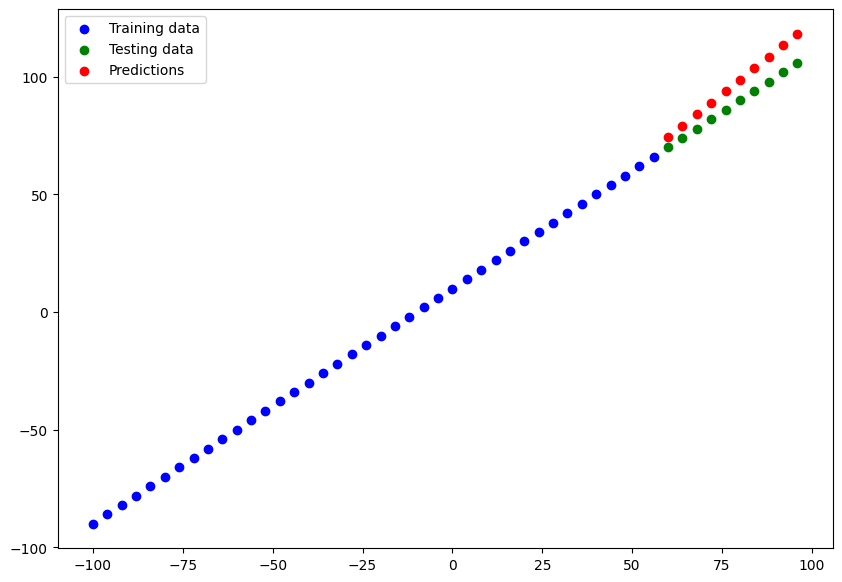

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Berdasarkan grafik plotnya, kita bisa melihat jika prediksi kita tidak terlalu melenceng tetapi juga tidak presisi.

## Mengevaluasi prediksi

Bersamaan dengan visualisasi, evaluation metrics adalah pilihan alternatif terbaik yang dapat kalian gunakan utnuk mengevaluasi model kalian.

Tergantung pada permasalahan yang sedang kalian kerjakan, meodel yang berbeda akan memiliki evaluation matrics yang berbeda pula.

Dua matriks utama yang biasanya digunakan untuk regression problem adalah:
* **Mean absolute error (MAE)** - perbedaan nilai rata-rata antara masing-masing prediksi.
* **Mean squared error (MSE)** - perbedaan nilai rata-rata yang dikuadratkan antara prediksi (digunakan jika error yang lebih besar ternyata lebih merugikan daripada error yang kecil).

Semakin kecil masing-masing nilai ini, akan semakin baik.

Kalian juga bisa menggunakan [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) yang akan mengembalikan loss dari model serta pengaturan matriks selama langkah kompilasi.

In [ ]:
# Mengevaluasi model pada test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 8.3611 - mae: 8.3611


[8.361111640930176, 8.361111640930176]

Dalam kasus kita, karena kita menggunakan MAE untuk loss function dan juga MAE untuk matriks, `model.evaulate()` akan mereturn keduanya.

TensorFlow juga memiliki fungsi bawaan untuk MSE dan MAE.

Untuk banyak fungsi evaluasi, premis yang digunakan sama: membandingkan prediksi dengan label ground truth.

In [ ]:
# Mengkalkulasi mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.547026, 11.881174, 10.365499, 10.      , 10.784678, 12.879301,
       16.139416, 20.549713, 25.425156, 30.300598], dtype=float32)>

Hmm? aneh, MAE seharusnya menghasilkan satu output.

Sebaliknya, kita justru mendapatkan 10 nilai.

Ini karena tensor `y_test` dan `y_preds` kita memiliki shape yang berbeda.

In [ ]:
# Memeriksa nilai tensor test label
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Memeriksa nilai tensor prediksi (perhatikan tanda kurung siku tambahannya)
y_preds

array([[ 74.42162 ],
       [ 79.297066],
       [ 84.17251 ],
       [ 89.04795 ],
       [ 93.92339 ],
       [ 98.798836],
       [103.67427 ],
       [108.54971 ],
       [113.425156],
       [118.3006  ]], dtype=float32)

In [ ]:
# Memeriksa tensor shape
y_test.shape, y_preds.shape

((10,), (10, 1))

Ingat bagaimana kita membahas tentang bentuk input dan output yang berbed, dan masalah ini merupakan salah satu yang paling umum kalian temui.

Tapi tidak perlu khawatir.

Kita dapat memperbaikinya dengan menggunakan [`squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze), ini akan menghapus `1` dimension dari tensor `y_preds`, membuatnya mempunyai shape yang sama dengan `y_test`.

> 🔑 **Catatan:** Jika kalian membandingkan dua tensor, penting untuk memastikan bahwa kedua tensor tersebut mempunyai shape yang tepat atau sesuai (kalian tidak harus memanipulasi shapenya, akan tetapi selalu waspada, *banyak* error yang terjadi karena tensor yang tidak cocok, terutama antara input dan output shapenya).

In [ ]:
# Shape sebelum squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape setelah squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# Seperti apa bentuknya?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.42162 ,  79.297066,  84.17251 ,  89.04795 ,  93.92339 ,
         98.798836, 103.67427 , 108.54971 , 113.425156, 118.3006  ],
       dtype=float32))

Okay, now we know how to make our `y_test` and `y_preds` tenors the same shape, let's use our evaluation metrics.

In [ ]:
# Mengkalkulasi MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.361112>

In [ ]:
# Mengkalkulasi MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=76.23097>

Kita juga bisa menghitung MAE dengan menggunakan fungsi TensorFlow.

In [ ]:
# Mereturn hasil yang sama dengan tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.361111450195313>

Sekali lagi, merupakan ide yang bagus untuk membuat fungsi apa pun yang kalian pikin akan digunakan berulang kali (atau kalian gunakan terus-terusan).

Sekarang mari kita membuat fungsi untuk evaluation metrics kita.

In [ ]:
def mae(y_test, y_pred):
  """
  Mengkalkulasi mean absolute error (MAE) antara y_test dan y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Mengkalkulasi mean squared error (MSE) antara y_test dan y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Melakukan eksperimen untuk meningkatkan akurasi prediksi model

Setelah melihat evaluation metrics dan prediksi yang dihasilkan model kalian, Pasti dari kalian ingin memperbaiki dan meningkatkan model tersebut.

Sekali lagi, terdapat banyak sekali cara berbeda yang dapat kalian lakukan, namun 3 cara utamanya adalah:
1. **Get more data** - dapatkan lebih banyak contoh untuk melatih model kalian (membuat model lebih banyak kesempatan mempelajari pola).
2. **Make your model larger (use a more complex model)** - untuk membuat model kalian lebih kompleks, kalian dapat meningkatkan jumlah layer atau hidden units disetiap layernya.
3. **Train for longer** - berikan model kalian lebih banyak kesempatan dalam menemukan pola-pola dalam data.

Sejak kita membuat dataset, kita dapat dengan mudah membuat lebih banyak data, namun hal ini tidak dapat selalu terjadi ketika kalian bekerja dengan dataset pada dunia nyata.

Jadi, sekarang mari kita lihat bagaimana kita dapat meningkatkan model kita menggunakan langkah 2 dan 3.

Untuk melakukannya, kita akan membuat 3 model dan membandingkan hasilnya:
1. `model_1` - sama seperti model aslinya, 1 layer, dilatih selama 100 epochs.
2. `model_2` - 2 layers, dilatih selama 100 epochs.
3. `model_3` - 2 layers, dilatih selama 500 epochs.

**Membuat `model_1`**

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Melakukan replikasi dari model original
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Menyusun model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Mencoba model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 90.8664 - mae: 90.8664
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 55.4109 - mae: 55.4109
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 19.0737 - mae: 19.0737
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 10.0340 - mae: 10.0340
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0097 - mae: 11.0097
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1750 - mae: 10.1750
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1964 - mae: 9.1964
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1464 - mae: 9.1464
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 15.2236 - mae: 15.2236
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 7.8565 - mae: 7.8565
Epoch 11/100
2/2 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 38ms/step


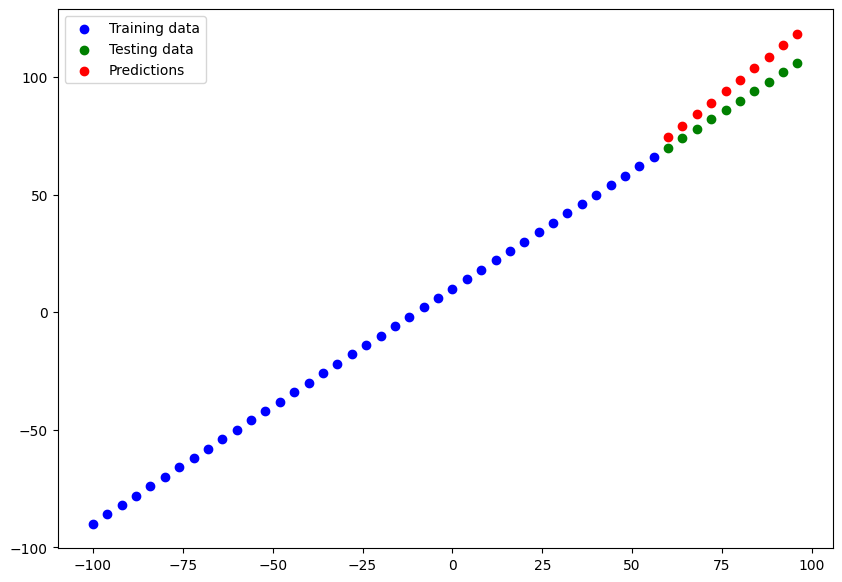

In [ ]:
# Membuat dan plot (memvisualisasikan) untuk model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Mengkalkulasi model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.44117, 77.64022)

**Membuat `model_2`**

Kali ini kita akan menambah dense layer (sehingga model kita akan memiliki 2 layer) namun hyperparameter lainnya tetap sama.

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Melakukan replikasi dari model_1 menambahkan layer tambahan
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # menambahkan layer kedua
])

# Menyusun model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Mencoba model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 48ms/step


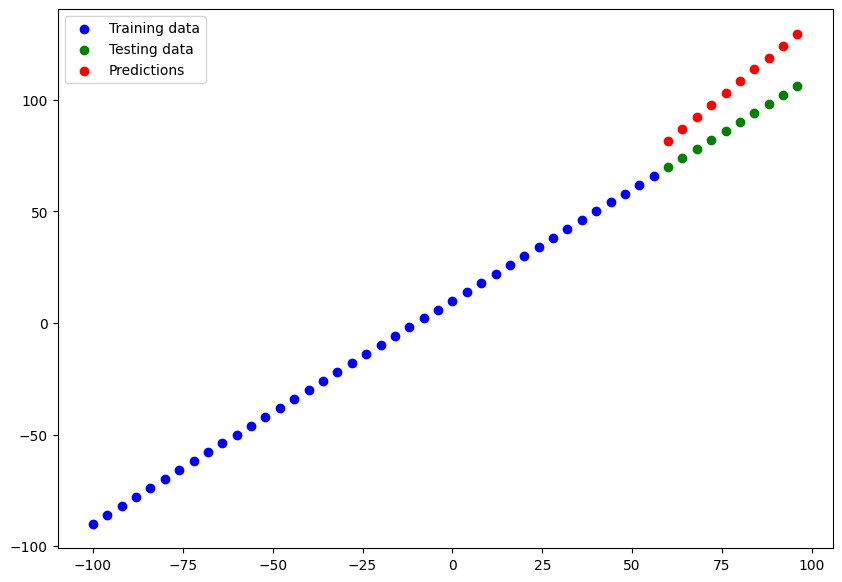

In [ ]:
# Membuat dan plot (memvisualisasikan) untuk model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

Wah, sudah terlihat lebih baik! Dan yang diperlukan hanyalah extra layer.

In [ ]:
# Mengkalkulasi model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(17.614613, 324.77832)

**Membuat `model_3`**

Untuk model ke-3, kita akan mempertahankan semuanya sama seperti `model_2` namun kali ini kita akan melatih modelnya menjadi lebih lama (500 epochs, bukan 100).

Hal ini akan memberikan model kita lebih banyak kesempatan untuk mempelajari pola-pola di dalam data.

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Melakukan replikasi dari model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Menyusun model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Mencoba model (namun kali ini 500 epochs, bukan 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 44ms/step


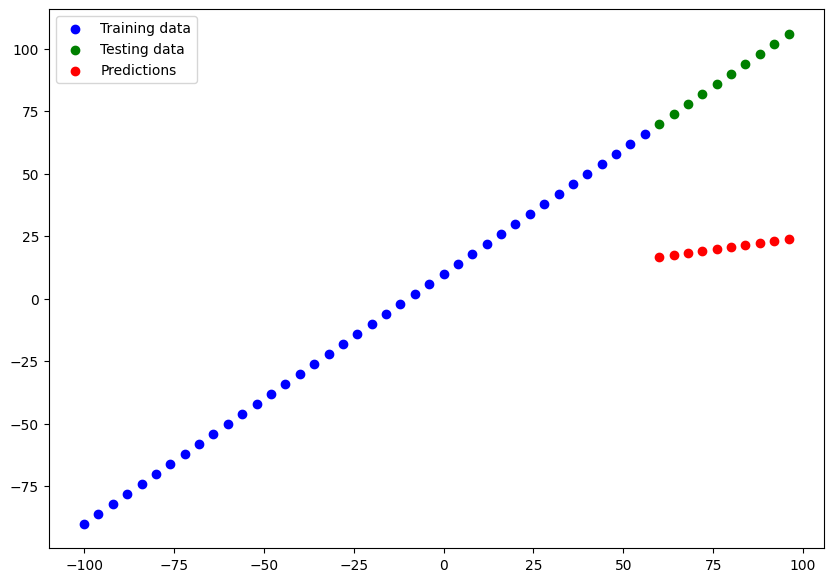

In [ ]:
# Membuat dan plot (memvisualisasikan) untuk model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Aneh, kita sudah melatihnya lebih lama namun model kita justru memiliki peforma yang lebih buruk?

Ternyata, model kita mungkin berlatih terlalu lama sehingga menghasilkan hasil yang lebih buruk (kita akan melihat cara-cara untuk mencegah latihan yang terlalu lama nanti).

In [ ]:
# Mengkalkulasi model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.66776, 4663.0103)

## Membandingkan hasil

Sekarang kita sudah mendapatkan 3 hasil yang sama namun sedikit berbeda, mari kita bandingkan.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.441170,77.640221
1,model_2,17.614613,324.778320
2,model_3,67.667763,67.667763


Dari percobaan yang kita lakukan, sepertinya `model_2` memiliki peforma yang terbaik.

Dan sekarang, kalian mungkin berfikir, "wow, membandingkan model itu ternyata membosankan..." dan memang benar, kita hanya membandingkan 3 model disini.

Tapi ini adakah bagian dari pemodelan pembelajaran machine learning, mencoba berbagai kombinasi model yang berbeda dan melihat mana yang memiliki peforma yang terbaik.

Setiap model yang kalian buat adalah sebuah eksperimen kecil.

> 🔑 **Catatan:** Salah satu tujuan kalian adalah meminimalkan waktu eksperimen kalian. Semakin banyak eksperimen yang kalian lakukan, semakin banyak hal yang akan kalian temukan dari model kalian yang tidak berhasil, dan semakin kalian mencoba, kalian akan semakin memahami dan menemukan kesalahan yang nantinya dapat kalian perbaiki sehingga model kalian bisa bekerja dengan baik. Ingatlah selalu moto yang digaungkan untuk Machine Learning: "experiment, experiment, experiment".

Hal lain yang juga akan kalian temukan adalah apa yang kalian pikir berhasil (seperti melatih model lebih lama) mungkin tidak selalu berhasil dan hal sebaliknya juga sering terjadi.

## Mentracking eksperimen kalian

Salah satu kebiasaan yang bagus untuk dilakukan dalam mengembangkan machine learning adalah melacak eksperimen kalian untuk melihat mana yang memiliki kinerja yang lebih baik dibandingkan yang lain.

**Selamat**, kalian sudah berhasil membuat model machine learning versi sederhana (menyimpan hasil dalam variabel yang berbeda).

> 📖 **Resource:** Namun, ketika kalian membuat lebih banyak model, kalian mungkin akan mempertimbangkan untuk menggunakan alat bantu seperti:
* [**TensorBoard**](https://tensorboard.dev/) - komponen dari library TensorFlow untuk membantu melacak eksperimen pemodelan (kita akan melihat ini nanti).
* [**Weights & Biases**](https://www.wandb.com/) - alat untuk melacak semua jenis eksperimen machine learning (kabar baiknya untuk tools Weights & Biases adalah alat ini terhubung ke TensorBoard).

## Menyimpan model

Setelah kalian melatih sebuah model dam menemukan model yang sesuai dengan keinginan kalian, kalian mungkin ingin menyimpannya untuk digunakan di tempat lain (seperti web application atau mobile device).

Kalian bisa menyimpan model TensorFlow/Keras dengan menggunakan [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Terdapat dua cara yang dapat digunakan untuk menyimpan model di TensorFlow:
1. [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

Perbedaan utama antara keduanya adalah SavedModel secara otomatis dapat menyimpan objek khusus (seperti special layers) tanpa memerlukan modifikasi tambahan ketika memuat model kembali.

Mana yang sebaiknya digunakan?

Tergantung pada situasi yang kalian hadapi, tetapi format SavedModel akan cukup untuk sebagian besar waktu.

Kedua method ini menggunakan method pemanggilan yang sama.

In [ ]:
# Menyimpan model menggunakan SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Melihat model - mengoutputkan protobuf binary file (.pb) serta file-file lainnya
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Sekarang, mari kita menyimpan model dalam HDF5 format, kita akan menggunakan method yang sama namun dengan nama file yang berbeda.

In [ ]:
# Menyimpan model dengan menggunakan HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Melihat model
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Memuat model

Kita bisa memuat model yang tersimpan dengan menggunakan method [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model).

Memuat model untuk format yang berbeda (SavedModel dan HDF5) adalah sama (selama nama path ke format tertentu benar).

In [ ]:
# Memuat model dari SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Sekarang mari kita uji.

In [ ]:
# Membandingkan model_2 dengan versi SavedModel (harusnya bernilai true)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 44ms/step


True

Memuat dari HDF5 format (caranya hampir sama).

In [ ]:
# Memuat model dari HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Membandingkan model_2 dengan versi HDF5 yang dimuat (harusnya bernilai true)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 63ms/step


True

## Mendownload model (dari Google Colab)

Misalkan jika kalian ingin menggunakan model yang kalian buat dari Google Colab ke mesin lokal, kalian dapat melakukan salah satu dari hal-hal berikut ini:
* Klik kanan pada file di panel file lalu klik 'download'.
* Menggunakan kode berikut.

In [ ]:
# Mendownload model (atau file apapun) dari Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Contoh yang lebih kompleks

Baiklah, kita sudah mempelajari dasar-dasar membangun model neural network regression di TensorFlow.

Sekarang mari kita tingkatkan lagi dan membangun model untuk dataset yang lebih banyak fiturnya.

Lebih spesifik kita akan mencoba memprediksi biaya asuransi kesehatan untuk individu berdasarkan beberapa parameter yang berbeda seperti, `age`, `sex`, `bmi`, `children`, `smoking_status` dan `residential_region`.

Untuk melakukannya, kita akan memanfaatkan dataset [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) yang disediakan oleh Kaggle dan [hosted di GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

> 🔑 **Catatan:** Ketika memperlajari paradigma machine learning, kalian akan sering melalui serangkaian teknik dasar dan kemudian mempraktikkannya dengan menggunakan open-source dataset dan contoh. Seperti yang kita lakukan sekarang, pelajari fundamental (dasar-dasarnya), terapkan pada masalah yang berbeda. Setiap kali kalian mengerjakan sesuatu yang baru, ada baiknya kalian mencari sesuatu seperti "problem X example with Python/TensorFlow"yang dimana X adalah soal / permasalahan kalian.

In [ ]:
# Mengimport library yang diperlukan
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Melakukan read pada dataset insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Melihat dataset insurance
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Kita harus mengubah non-numerical columns menjadi angka (karena neural network tidak dapat menangani input non numerik).

Untuk melakukannya, kita akan menggunakan method yang terdapat dalam pandas yaitu [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

Ini akan mengubah variabel kategori (seperti kolom `sex`, `smoker` dan `region`) menjadi variabel numerical menggunakan one-hot encoding.

In [ ]:
# Mengubah semua kategori menjadi angka
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # melihat kolom yang sudah dikonversi

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Sekarang kita akan membagi data menjadi features (`X`) dan labels (`y`).

In [ ]:
# Membuat nilai X & y
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Melihat features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Untuk membuat training dan test set, kita bisa melakukannya secara manual, namun untuk membuatnya lebih mudah, kita akan memanfaatkan fungsi [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) fungsi yang sudah tersedia dari Scikit-Learn.

In [ ]:
# Membuat training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

Sekarang kita dapat membuat dan fit (mencoba) model (kita akan membuatnya sama dengan `model_2`).

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Create a new model (sama seperti model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Menyusun model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Mencoba model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 9523.4434 - mae: 9523.4434
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7850.5962 - mae: 7850.5962
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7569.4038 - mae: 7569.4038
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7553.2910 - mae: 7553.2910
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7697.7773 - mae: 7697.7773
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 7558.4438 - mae: 7558.4438
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7584.6377 - mae: 7584.6377
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7792.1919 - mae: 7792.1919
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7481.4326 - mae: 7481.4326
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7768.5630 - mae: 7768.5630

In [ ]:
# Mengecek hasil model insurance
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7054.5928 - mae: 7054.5928


[7054.5927734375, 7054.5927734375]

Model kita tidak bekerja dengan baik, mari kita coba model yang lebih besar.

Kita akan mencoba 3 hal:
- Menambah jumlah layers (2 -> 3).
- Menambah number of units di setiap layer (kecuali untuk output layer).
- Mengganti optimizer (dari SGD ke Adam).

Seluruhnya akan tetap sama.

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Menambah extra layer dan number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (penting untuk output layer)
])

# Menyusun model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Mencoba model dan menyimpannya ke variabel history (supaya kita dapat plot ini)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Mengevaluasi model kita yang sudah ditingkatkan
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 5083.7236 - mae: 5083.7236


[5083.7236328125, 5083.7236328125]

Jauh lebih baik! Menggunakan model yang lebih besar dan Adam optimizer menghasilkan hampir setengah kesalahan model sebelumnya.

> 🔑 **Catatan:** Untuk banyak masalah, [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) adalah pilihan awal yang bagus. lihat poin Andrei Karpathy's "Adam is safe" dari  [*A Recipe for Training Neural Networks*](http://karpathy.github.io/2019/04/25/recipe/) untuk lebih lanjut.

Sekarang mari kita lihat kurva loss dari model kita, seharusnya kita akan melihat tren kurva menurun.

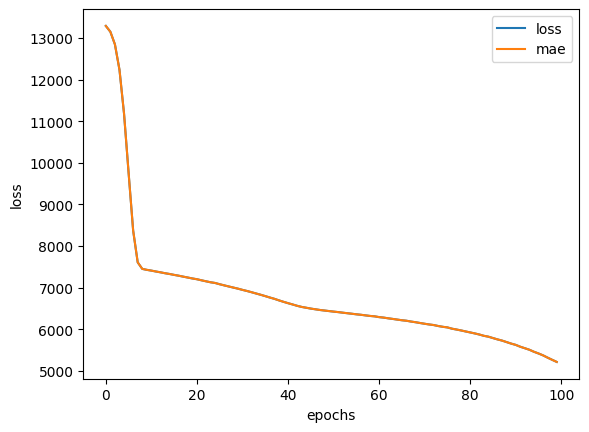

In [ ]:
# Melakukan plot (memvisualisasikan) history (yang juga dikenal sebagai kurva kerugian)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Dari sini, terlihat bahwa model loss (dan MAE) kita masih terus menurun (dalam kasus kita, MAE dan loss adalah sama, sehingga garis-garis pada plot saling tumpang tindih).

Hal ini menunjukan bahwa loss mungkin akan berkurang jika kita mencoba melatihnya lebih lama.

> 🤔 **Pertanyaan:** Berapa lama seharusnya model kalian berlatih?

> Sekali lagi, itu tergantung pada masalah apa yang kalian kerjakan. Terkadang pelatihan tidak membutuhkan waktu yang lama, di lain waktu bisa lebih lama dari yang anda perkirakan. Metode umum yang digunakan adalah mengatur pelatihan model kita untuk waktu yang lama (misalnya. 1000 epochs) tetapi mengaturnya dengan [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) sehingga pelatihan akan berhenti secara otomatis ketika berhenti meningkat. Kita akan melihat hal ini di modul lain.

Mari kita latih model yang sama seperti di atas sedikit lebih lama. Kita dapat melakukan ini tetapi dengan memanggilnya lagi.

In [ ]:
# Mencoba melatih model sedikit lebih lama (100 epochs lagi)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

Bagaimana hasil dari extra training tersebut?

In [ ]:
# Mengevaluasi model yang dilatih untuk total 200 epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3508.1272 - mae: 3508.1272


(3508.127197265625, 3508.127197265625)

Duarrr! Dengan melatih model untuk 100 epochs tambahan, kita melihat sekitar 10% penurunan error.

Lalu bagaimana tampilan visualnya?

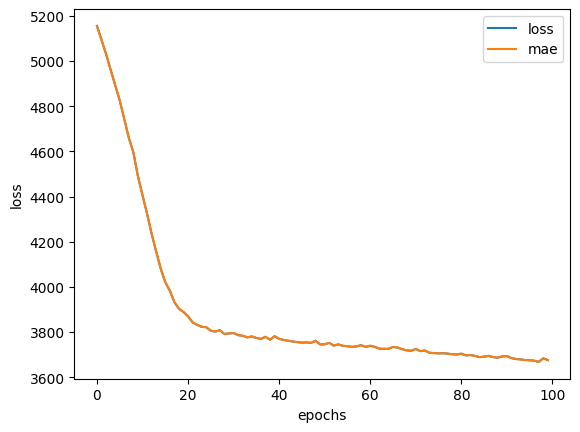

In [ ]:
# Melakukan plot model yang dilatih untuk total 200 epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs hanya akan menampilkan 100 mengesampingkan variabel history

## Preprocessing data (normalization dan standardization)

Hal umum saat bekerja dengan neural networks adalah memastikan semua data yang Anda berikan ke jaringan tersebut berada dalam rentang 0 hingga 1.

Kegiatan ini biasanya disebut  **normalization** (menskalakan semua nilai dari rentang aslinya ke, misalnya. antara 0 dan 100,000 menjadi antara 0 dan 1).

Terdapat pula proses lain yang disebut sebagai **standardization** yang mengubah semua data kalian menjadi unit variance  dan 0 mean.

Kedua praktik ini sering kali menjadi bagian dari pipeline preprocessing (serangkaian fungsi untuk mempersiapkan data kalian untuk digunakan dengan neural network).

Dengan mengetahui hal ini, beberapa langkah utama yang akan kalian lakukan untuk melakukan pra-pemrosesan data kalian untuk neural network meliputi:
* Mengubah semua data kalian menjadi angka (neural network tidak dapat menangani data string).
* Memastikan data kalian dalam shape yang benar (memverifikasi shape input dan output).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (memastikan semua value berada di antara 0 dan 1). Hal ini dapat dilakukan dengan mengurangi nilai minimum kemudian membaginya dengan nilai maksimum kemudian dikurangi dengan nilai minimum. Ini juga biasa disebut sebagai min-max scaling.
    * Standardization (memastikan semua nilai memiliki mean 0 dan variance 1). Hal ini bisa dilakukan dengan cara mengurangi nilai rata-rata dari fitur target dan kemudian membaginya dengan standar deviasi.
    * Mana yang harus Anda gunakan?
      * **Dengan neural networks kalian akan cenderung memilih normalisasi** karena mereka cenderung lebih memilih nilai antara 0 dan 1 (kalian akan melihat ini terutama dengan pemrosesan gambar), namun kalian akan sering menemukan bahwa jaringan saraf dapat bekerja dengan cukup baik dengan penskalaan fitur yang minimal.

> 📖 **Resource:** Untuk informasi lebih lanjut mengenai preprocessing data, saya menyarankan kalian untuk membaca sumber-sumber berikut ini:
* [Scikit-Learn's documentation on preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data).
* [Scale, Standardize or Normalize with Scikit-Learn by Jeff Hale](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

Kita telah mengubah data kita menjadi angka dengan menggunakan `get_dummies()`, sekarang mari kita lihat bagaimana kita menormalkannya (normalization).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Melakukan read pada dataset insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Melihat data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Sekarang, sama seperti sebelumnya, kita perlu mengubah non-numerical columns menjadi angka dan kali ini kita juga akan normalizing numerical columns dengan range yang berbeda (untuk memastikan semuanya berada di antara 0 dan 1).

Untuk melakukannya, kita akan menggunakan beberapa classes dari Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - membuat fungsi data preprocessing multi-langkah untuk transformasi berikut:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - memastikan semua kolom numerik dinormalisasi (antara 0 dan 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - melakukan one hot encode untuk non-numerical columns.

Ayo kita lihat bagaimana melakukannya.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Membuat kolom transformer (ini akan membantu kita normalize/preprocess data kita)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # mendapatkan semua nilai antara 0 dan 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Membuat X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Membuat train dan test sets (menggunakan random state untuk memastikan spilt yang sama seperti sebelumnya)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan fit column transformer pada training data saja (melakukannya pada data uji akan mengakibatkan data leakage)
ct.fit(X_train)

# Mentransformasikan training dan test data dengan normalization (MinMaxScalar) dan one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Sekarang kita telah melakukan normalized dan one-hot encoding, lalu seperti apa data kita sekarang?

In [ ]:
# Contoh non-normalized dan non-one-hot encoded data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Contoh normalized dan one-hot encoded
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

How about the shapes?

In [ ]:
# perhatikan normalized/one-hot encoded shape lebih besar karena adanya kolom tambahan
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Data kita sudah normalized dan numerical, mari kita buat modelnya.

Kita akan menggunakan model yang sama dengan `insurance_model_2`.

In [ ]:
# Mendefinisikan random seed
tf.random.set_seed(42)

# Membuat model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Menyusun model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Mencoba model untuk 200 epochs (sama seperti insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

Mari kita evaluasi model pada test set yang normalized.

In [ ]:
# Mengevaluasi model ke-3
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3166.7854 - mae: 3166.7854


Dan terakhir, mari kita bandingkan hasil dari `insurance_model_2` (dilatih pada data yang tidak dinormalisasi / non-normalized data) dan `insurance_model_3` (dilatih pada data yang dinormalisasi / normalized data).

In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3508.127197265625, 3166.785400390625)

Dari sini kita dapat melihat jika normalizing data menghasilkan 10% lebih sedikit error menggunakan model yang sama dibandingkan dengan tidak menormalkan data.

Ini adalah **salah satu keuntungan utama dari normalization: waktu konvergensi yang lebih cepat** (cara yang lebih elegan dikatakan, model kalian akan mendapatkan hasil yang lebih baik dengan lebih cepat).

`insurance_model_2` pada akhirnya dapat mencapai hasil yang sama dengan  `insurance_model_3` jika kita membiarkannya berlatih lebih lama.

Selain itu, hasilnya dapat berubah jika kita mengubah arsitektur model, misalnya. menambahkan lebih banyak layer atau hidden units per layer.

Tetapi tujuan utama kita sebagai perekayasa neural network adalah untuk mengurangi waktu antara percobaan, apapun yang membantu kita mendapatkan hasil yang lebih baik dan cepat adalah nilai tambahan.

## 🛠 Latihan

Kita sudah membahas banyak hal dengan cukup cepat.

Jadi sekarang saatnya untuk **bereksperimen secara mandiri** dengan beberapa hal dan mulai membangun intuisi kalian.

Kami menekankan kata bereksperimen secara mandiri karena memang itu sangatlah penting. Cobalah beberapa hal, jalankan kodenya dan lihat apa yang terjadi.

1. Buatlah regression dataset kalian sendiri (atau buatlah dataset yang telah kita buat di "Membuat data untuk di lihat (view) dan disesuaikan (fit)" menjadi lebih besar) dan buatlah model yang sesuai dengan dataset tersebut.
2. Coba buat neural network dengan 4 Dense layers dan lakukan penyesuaian (fitting) dengan regression dataset, bagaimana kinerjanya?
3. Coba tingkatkan hasil yang kita dapatkan pada insurance dataset, beberapa hal yang mungkin ingin Anda coba antara lain:
  * Membangun model yang lebih besar (bagaimana hasil dari model dengan 4 dense layers?).
  * Menambah number of units disetiap layer.
  * Lihat dokumentasi dari [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) dan mencari tahu apa parameter pertamanya, apa yang terjadi jika kalian meningkatkannya sebanyak 10x?
  * Apa yang terjadi jika Anda berlatih lebih lama (mungkin 300 epochs, bukan 200)?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) dari TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) dan buat modelnya.


## 📖 Extra curriculum (Pembelajaran Tambahan)

Jika Anda mencari materi tambahan yang berkaitan dengan hands-on ini, saya sarankan untuk melihat yang berikut ini:

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gmemberikan gambaran umum yang bagus tentang apa yang terjadi di balik semua kode yang kita jalankan.
* Membaca: 1 jam dari [Bab 1 of Neural Networks dan Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) oleh Michael Nielson - contoh yang sangat mendalam dan praktis tentang intuisi di balik neural networks.

Untuk melatih regression modelling kalian dengan TensorFlow, saya juga menyarankan kalian untuk melihat [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) atau [Kaggle's datasets](https://www.kaggle.com/data), lalu carilah regression dataset yang menarik bagi Anda dan cobalah membuat model.